The intention was to learn something about network visualization in R, then maybe use it as the "creative" part of my CV.

I have created list of technologies, tools, software languages I have known and have experience with. Then try to assess what is my level of comfortability with them. I'm not exactly sure what that means exactly, it is very hard to do and it is always very subjective. I have that feeling that however much I know about something there is still soo much I don't and this most probably won't change anytime soon if ever. So take it with a grain of salt and don't put too much attention to it.

Let's get to it then.

First, we need data, let's load what I made up and then examine it a bit.

In [9]:
nodes <- read.csv("skills-NODES.csv", header=T, as.is=T)
links <- read.csv("skills-EDGES.csv", header=T, as.is=T)

head(nodes)
head(links)

id,skill,skill.type,skill.name,comfortability
s01,Pivotal HD,1,Data,50
s02,Hortonworks HDP,1,Data,60
s03,Spark,1,Data,70
s04,Apache HDP (HAWQ),1,Data,70
s05,HBase,1,Data,40
s06,Hive,1,Data,40


from,to,weight,type
s01,s02,20,similar
s01,s03,10,includes
s01,s04,10,includes
s01,s05,10,includes
s01,s06,10,includes
s01,s07,10,includes


As you can see, we have list of skills, their types - again, not something to put much attention to, It's just so that it was possible to group them somehow. I may focus more on that in future though. And the last column is the already mentioned comfortability.

Then we have a table in which I tried to list connections with weights between each of the technologies.

I'll be trying to draw some graphs out of it using the igraph library.

In [5]:
library("igraph")


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



In order to use it, I have to convert the data to igraph object. The graph_from_data_frame() is a function to use. It needs two arguments, first with list of edges and second with verticles.

In [10]:
net <- graph_from_data_frame(d=links, vertices=nodes, directed=F) 

First attempt to show it

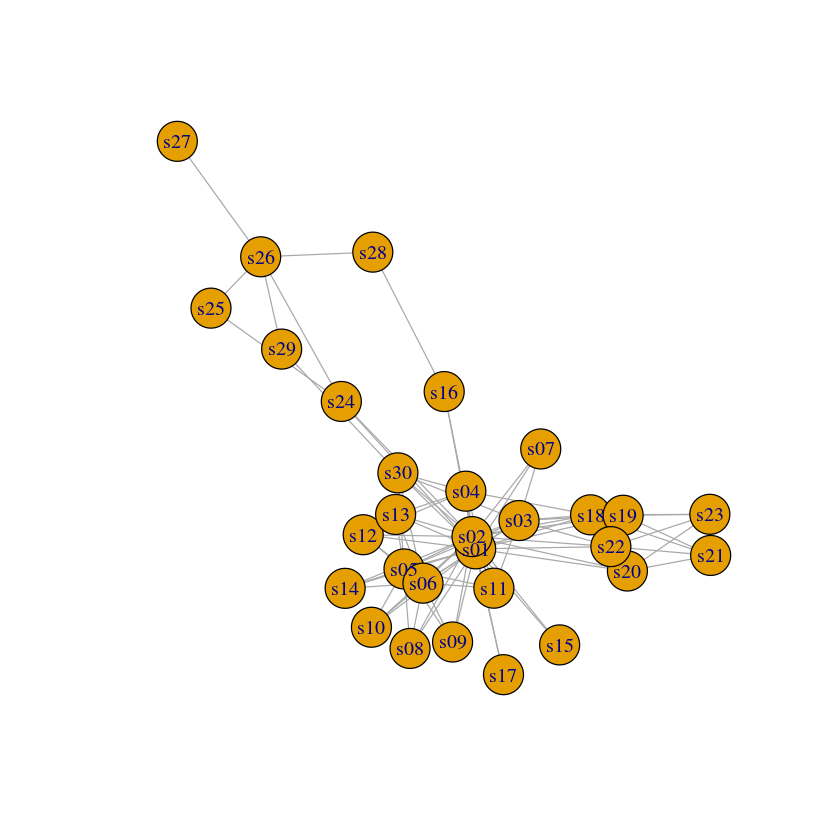

In [11]:
plot(net)

Yea ... I guess. Some work still in front of us. We can try to use a bit more meaningful labels for start and maybe curve the edges a little bit.

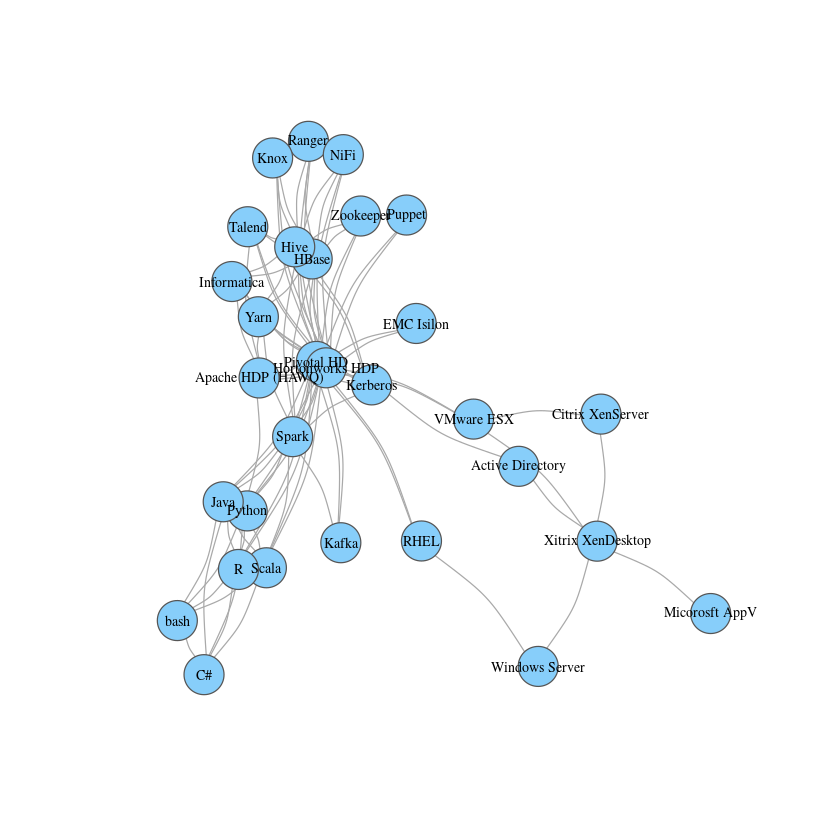

In [14]:
plot(net, edge.curved=.2,
     vertex.color="lightskyblue", vertex.frame.color="#555555",
     vertex.label=V(net)$skill, vertex.label.color="black",
     vertex.label.cex=.7) 

Maybe we can change the layout from the default one.

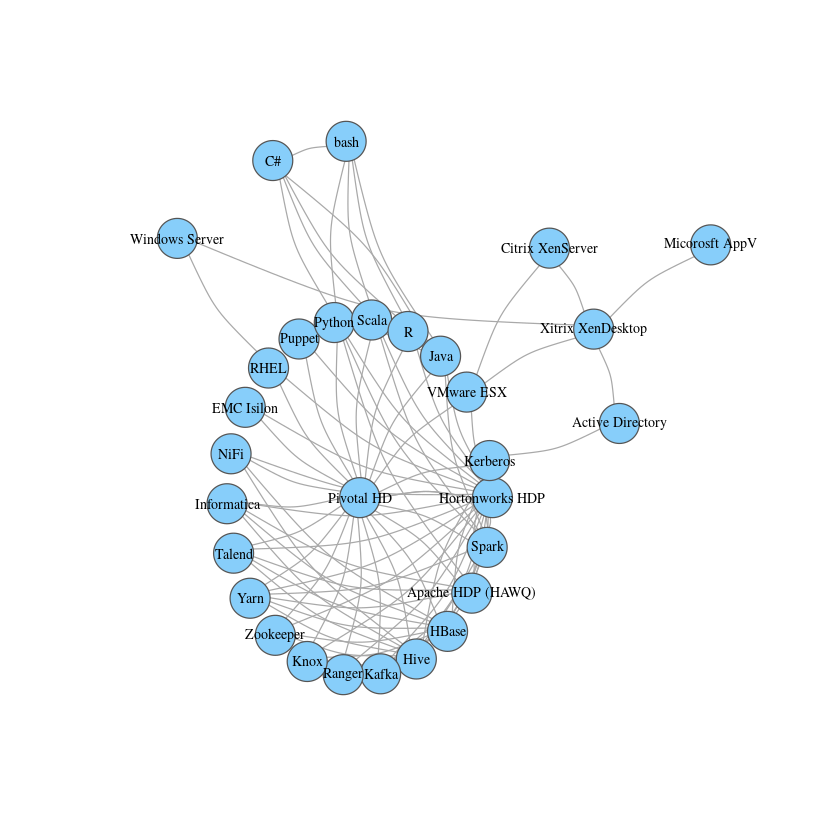

In [15]:
layout <- layout.reingold.tilford(net, circular=T)

plot(net, edge.curved=.2,
     vertex.color="lightskyblue", vertex.frame.color="#555555",
     vertex.label=V(net)$skill, vertex.label.color="black",
     vertex.label.cex=.7, layout=layout) 

I guess I need to work a little bit more on the layout part, for now let's focus on colors though. Let's have them based on skill type. And then we will try to figure out how to determine node size too.

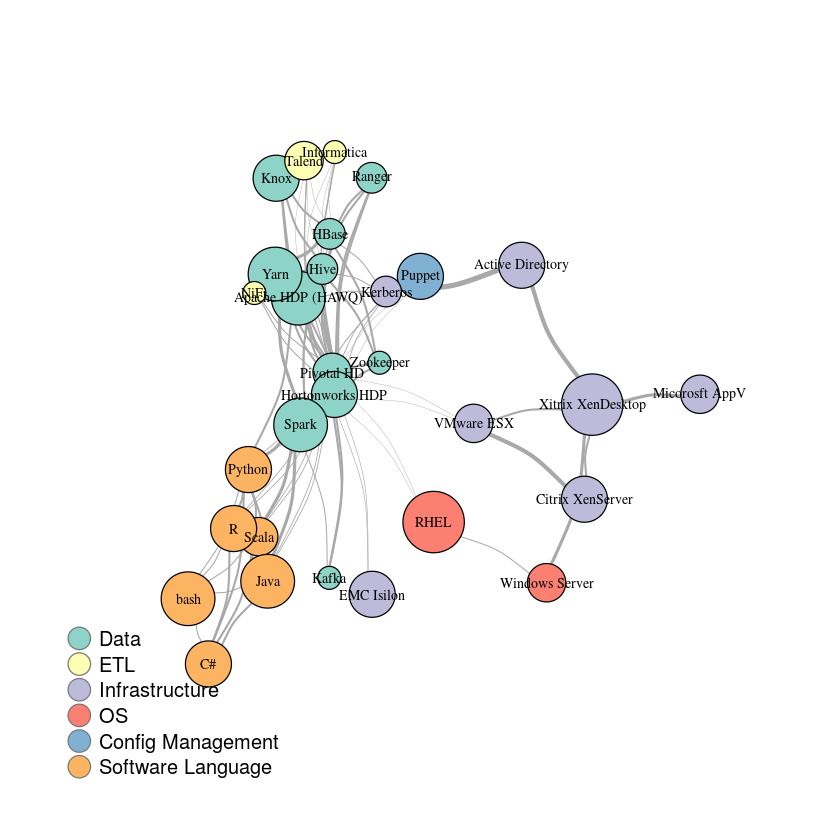

In [85]:
library("RColorBrewer")

# I'm not really good at choosing colors, let's use some already defined, well selected ones.
colrs <- brewer.pal(6, "Set3")
V(net)$color <- colrs[V(net)$skill.type]

deg <- degree(net, mode="all")
V(net)$size <- deg*2
V(net)$size <- V(net)$comfortability*0.3

# Setting edge width based on weight:
E(net)$width <- E(net)$weight/6

plot(net, edge.curved=.2,
     vertex.label=V(net)$skill, vertex.label.color="black",
     vertex.label.cex=.7) 

legend(x=-1.5, y=-0.8, c("Data","ETL", "Infrastructure", "OS", "Config Management", "Software Language"), pch=21,
       col="#777777", pt.bg=colrs, pt.cex=2.5, bty="n", ncol=1)

Edges want their colors too. 

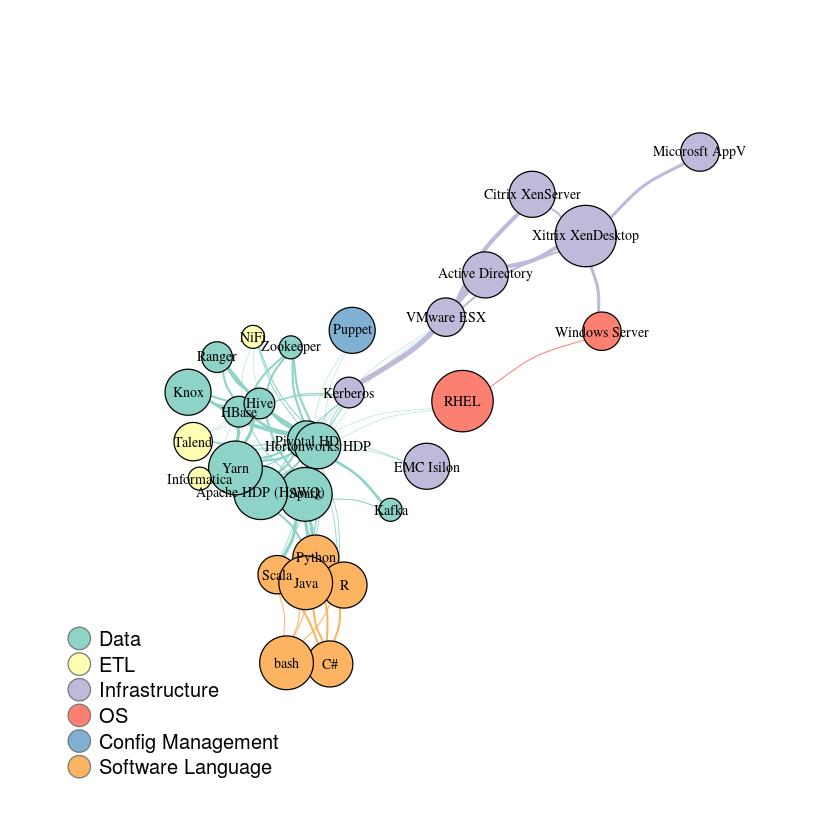

In [67]:
edge.start <- ends(net, es=E(net), names=F)[,1]
edge.col <- V(net)$color[edge.start]

plot(net, edge.curved=.2, edge.color=edge.col,
     vertex.label=V(net)$skill, vertex.label.color="black",
     vertex.label.cex=.7) 

legend(x=-1.5, y=-0.8, c("Data","ETL", "Infrastructure", "OS", "Config Management", "Software Language"), pch=21,
       col="#777777", pt.bg=colrs, pt.cex=2.5, bty="n", ncol=1)

Another try to produce it with better readability

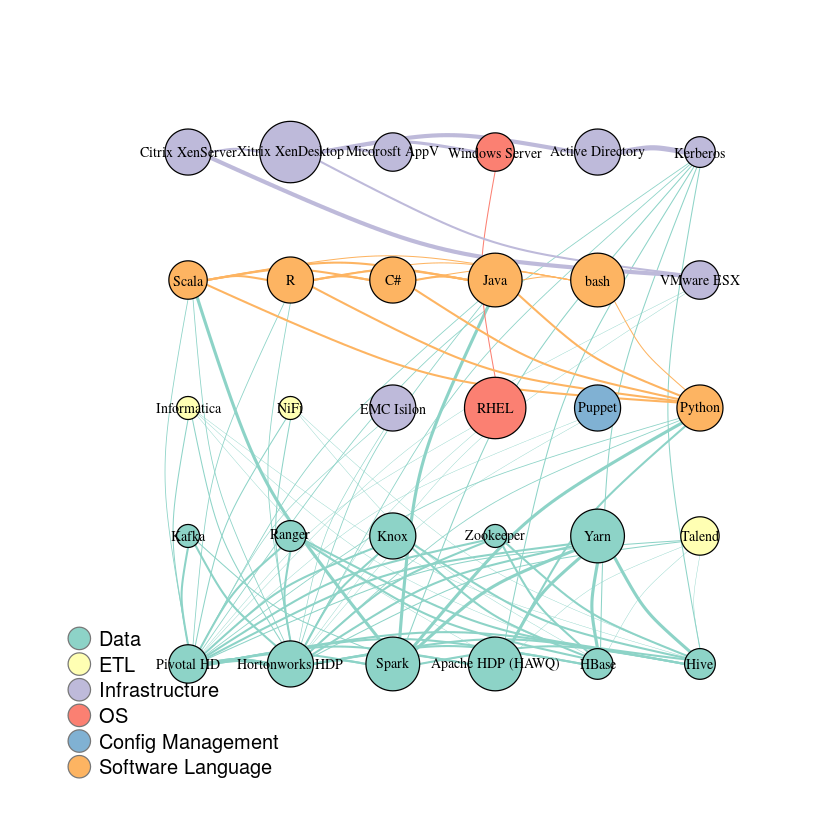

In [68]:
l <- layout_on_grid(net)

plot(net, edge.curved=.2, edge.color=edge.col,
     vertex.label=V(net)$skill, vertex.label.color="black",
     vertex.label.cex=.7, layout=l) 

legend(x=-1.5, y=-0.8, c("Data","ETL", "Infrastructure", "OS", "Config Management", "Software Language"), pch=21,
       col="#777777", pt.bg=colrs, pt.cex=2.5, bty="n", ncol=1)

Ok, that makes it a bit more readable. But I don't really like it. So let's experiment with the layout further.

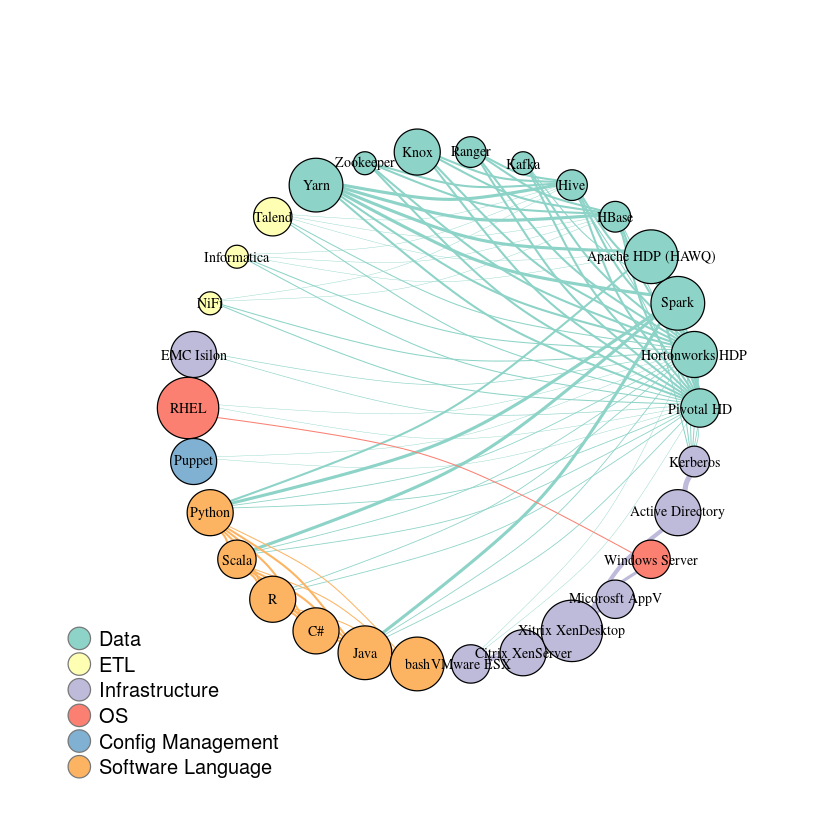

In [69]:
l <- layout_in_circle(net)

plot(net, edge.curved=.2, edge.color=edge.col,
     vertex.label=V(net)$skill, vertex.label.color="black",
     vertex.label.cex=.7, layout=l) 

legend(x=-1.5, y=-0.8, c("Data","ETL", "Infrastructure", "OS", "Config Management", "Software Language"), pch=21,
       col="#777777", pt.bg=colrs, pt.cex=2.5, bty="n", ncol=1)

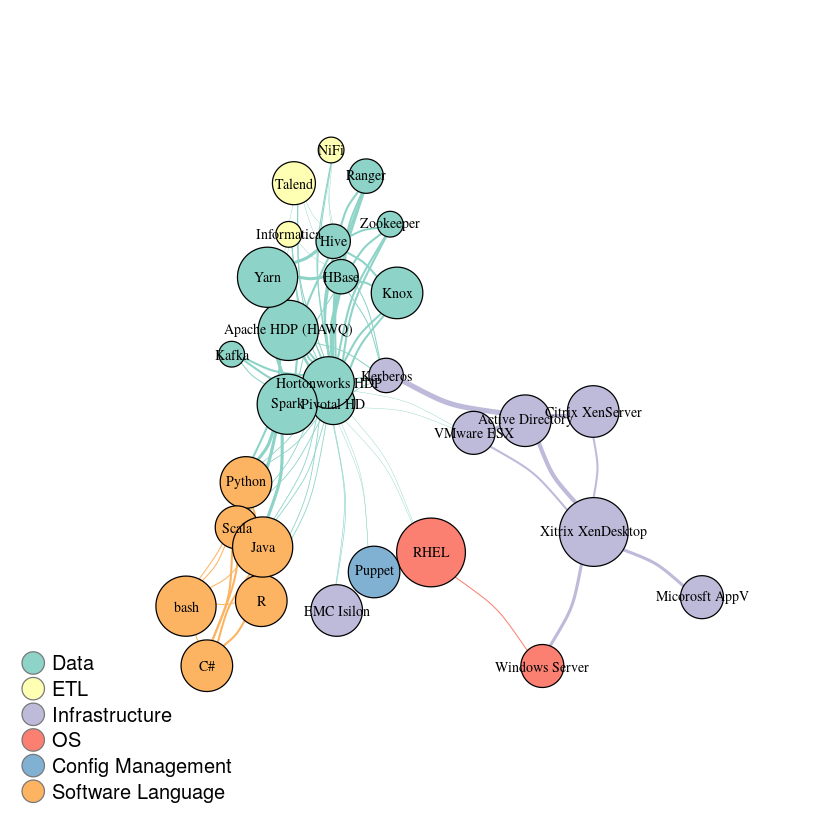

In [82]:
l <- layout_with_fr(net)

l <- norm_coords(l, ymin=-1, ymax=1, xmin=-1, xmax=1)

plot(net, edge.curved=.2, edge.color=edge.col,
     vertex.label=V(net)$skill, vertex.label.color="black",
     vertex.label.cex=.7, rescale=F, layout=l*0.9) 

legend(x=-1.5, y=-0.8, c("Data","ETL", "Infrastructure", "OS", "Config Management", "Software Language"), pch=21,
       col="#777777", pt.bg=colrs, pt.cex=2.5, bty="n", ncol=1)

It's getting interresting. Last step for now would be to apply community detection alghoritm to try to group the nodes based on the label propagation.

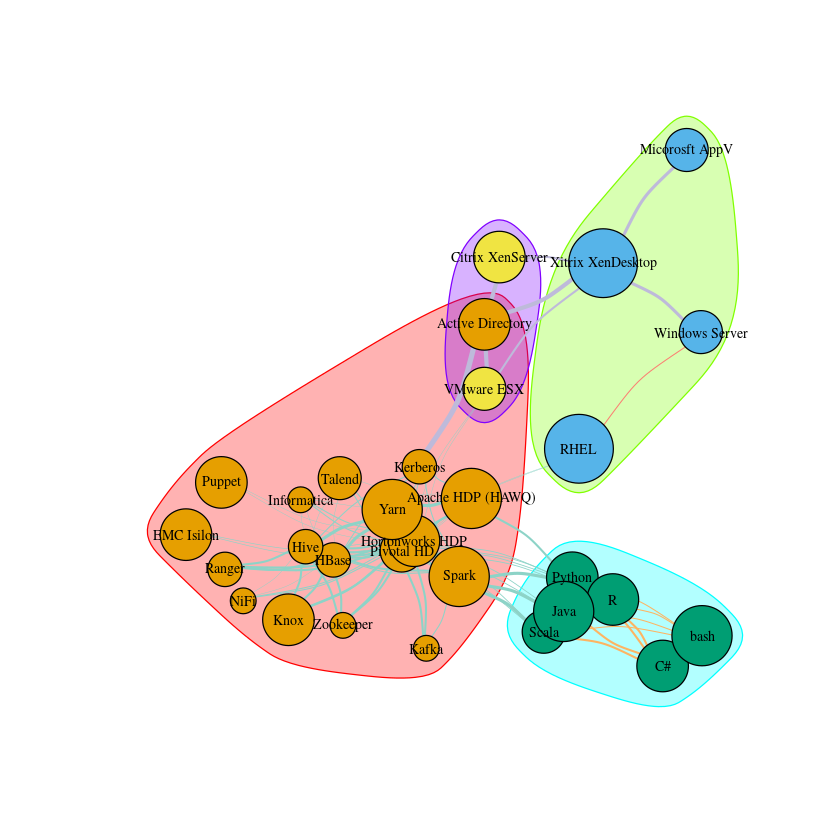

In [91]:
clp <- cluster_label_prop(net)

l <- layout_with_fr(net)

l <- norm_coords(l, ymin=-1, ymax=1, xmin=-1, xmax=1)

plot(clp, net, edge.curved=.2, edge.color=edge.col,
     vertex.label=V(net)$skill, vertex.label.color="black",
     vertex.label.cex=.7, rescale=F, layout=l*0.9) 

It did its job quite well, didn't it?

That's it for now. I have used materials from various sources, most helpful were those from Katherine Ognyanova blog. You can check it here: http://kateto.net/networks-r-igraph. Not very often one can find so well written articles, with that good balance between simplicity and amount of content provided. I can only say it's awesome :)